### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/cluster-validity">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
# All *.py will be stored under the following 
# location i.e. '/content/example.py'.
!git clone 'http://github.com/Nak007/cluster-validity.git'

# Change current directory to where *.py is stored.
%cd '/content/cluster-validity'

## Example

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from cluster_validity import *

Create datasets.

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, cluster_std=1.2, random_state=204, centers=4)

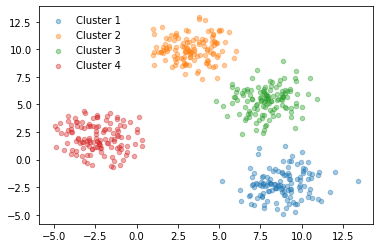

In [3]:
for n in np.unique(y):
    plt.scatter(X[y==n,0], X[y==n,1], alpha=0.4, s=20, 
                label='Cluster {}'.format(n+1))
plt.legend(loc='best', framealpha=0)
plt.show()

In [4]:
labels = np.hstack([KMeans(n_clusters=n, random_state=99).fit_predict(X).reshape(-1,1) for n in range(1,11)])

### Elbow method

The method consists of plotting the within-cluster sums of squares, $W(k)$ as a function of the number of clusters $k$, and picking the point where $W(k)$ start decreasing in a linear fashion, so-called `Elbow`, as the number of clusters to use. Nevertheless, picking point, particularly from a smooth curve, is somewhat difficult to find $k$ that correctly represents a number of clusters, thus we introduce $\gamma(k)$, which is defined as follows:

> $\gamma(k) = \frac{\delta(k) - \delta(k-1)}{|\delta(k-1)|}$, where $\delta(k) = \frac{W(k) - W(k-1)}{|W(k-1)|}$

Compute `Elbow` via using `elbow_index` function.

In [5]:
elbow_score = elbow_index(X, labels)

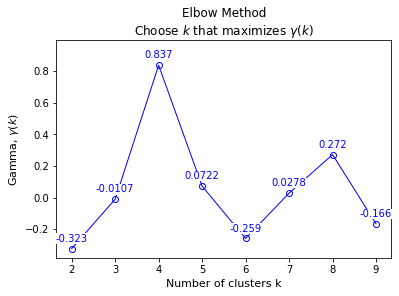

In [6]:
plot_elbow(elbow_score)

### WB-index

$wb(k)$ is defined as follows: 

> $wb(k) = \frac{W(k)}{B(k)}.k$

where $B􏰍(k)$􏰎 and $W(􏰍k)$􏰎 are the between- and within-cluster sums of squares, with $k$ clusters.

Compute `WB-index` via using `wb_index` and `plot_wb`.

In [7]:
wb_score = wb_index(X, labels)

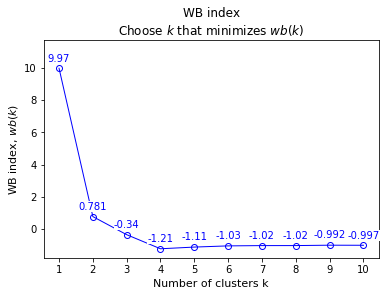

In [8]:
plot_wb(wb_score)

### Calinski-Harabasz

The Calinski-Harabasz index (􏰃1974) also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion.

> $ch(k) = \frac{B(k)/(k-1)}{W(k)/(N-k)}$

where $B􏰍(k)$􏰎 and $W(􏰍k)$􏰎 are the between- and within-cluster sums of squares, with $k$ clusters. The idea is to maximize $ch(k)$􏰎 over the number of clusters $k$. $ch(1)$􏰎 is not defined; even if it were modified by replacing $k-1$ with $k$, its value at 1 would be 0. Since $ch(k) > 0$ for $k>1$, the maximum would never occur at $k=1$.

Compute `Calinski-Harabasz index` via using `calinski_harabasz` function.

In [9]:
ch_index = calinski_harabasz(X, labels)

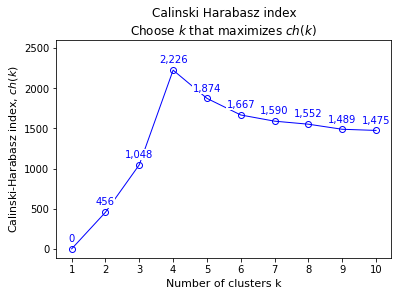

In [10]:
plot_ch(ch_index)

### Hartigan

This metric was proposed by J. A. Hartigan for detecting the optimum number of clusters $k$ to be applied in the k-means clustering algorithm:

> $H(k) = \gamma(k).\frac{W(k)−W(k+1)}{W(k + 1)}, \gamma(k) = N−k−1$

denoting $W(k)$ the intra-cluster dispersion, defined as the total sum of square distances of the objects to their cluster centroids. The parameter $\gamma$ is introduced in order to avoid an increasing monotony with increasing $k$. According to Hartigan, the optimum number of clusters is the smallest $k$ which produces $H(k) \leq \eta$ (typically $\eta$ = 10). 

Compute `Hartigan index` via using `hartigan_index` function.

In [11]:
h_index = hartigen_index(X, labels)

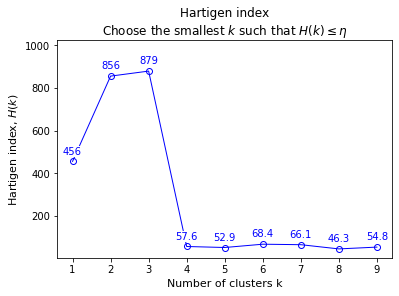

In [12]:
plot_hartigan(h_index)

### Silhouette

This method is based on the _`silhouette width`_, an indicator for the quality of each object. The silhouette width is defined as:

> $sil(x_{i}) = \frac{b(i) − a(i)}{max(a(i), b(i))}$

where $a(i)$ denotes the average distance of the object $i$ to all objects of the same cluster, and $b(i)$ is the average distance of the object $i$ to the objects of the closest cluster. Based on the object silhouettes, one can extend the silhouette scores to validate each individual cluster using the average of the cluster object silhouettes:

> $sil(C_{j})= \frac{1}{|C_{j}|}\sum_{x_{i}\in C_{j}}sil(x_{i})$

Finally, the silhouette score which validates the whole partition of the data is obtained by averaging the cluster silhouette widths:

> $sil(k) = \frac{1}{k}\sum_{r=1}^{k}sil(C_{r})$

The optimum $k$ maximises $sil(k)$.

Compute `Silhouette width` via using `silhouette` function.

In [13]:
sil = silhouette(X, labels)

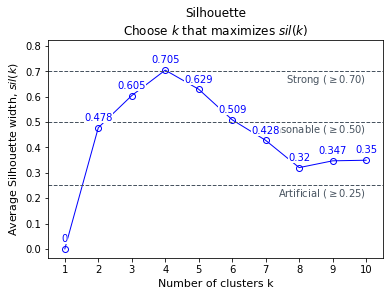

In [14]:
plot_silhouette(sil)

### Gap statistic

Our data $\{x_{ij}\}, i􏰅 = 1,2,...,n, j􏰅 = 1,2,...,p,$ consist of $p$ features measured on $n$ independent observations. Let $d_{ii'}$ denote the distance between observations $i$ and $i'$. The most common choice for $d_{ii'}$ is the `squared Euclidean distance` $\sum_{j} (x_{ij} - x_{i'j})^{2}$.

Suppose that we have clustered the data into $k$ clusters $C_{1}, C_{2}, . . ., C_{k}$, with $C_{r}$ denoting the indices of observations in cluster $r$, and $n_{r} 􏰅= |C_{r}|$. Let

> $D_{r} = \sum_{i,i'\in C_{r}}d_{ii'}$

> $D_{r} = \sum_{x_{i}\in C_{r}}\sum_{x_{j}\in C_{r}}\|x_{i} - x_{j} \|^{2} = 2n_{r}\sum_{x_{i}\in C_{r}}\|x_{i}-\mu_{r}\|^{2}$

be the sum of the pairwise distances for all points in cluster $r$, and set

> $W_{k} = \sum_{r=1}^{k}\frac{1}{2n_{r}}D_{r}$

The idea of our approach is to standardize the graph of $log􏰂(W_{k})$􏰃 by comparing it with its expectation under an appropriate null reference distribution of the data. 􏰀The importance of the choice of an appropriate null model is demonstrated in Gordon 􏰀(1996). Our estimate of the optimal number of clusters is then the value of $k$ for which $log􏰂(W_{k})$􏰃 falls the farthest below this reference curve. Hence we define

> $Gap(k) = E\{\log{􏰂(W_{kb})}\} - \log{􏰂(W_{k})}$

where $W_{kb}$ denotes the average intra-cluster distance of the $b^{th}$ realization of the reference distribution using $k$ clusters. The optimum number of clusters is the _`smallest value`_ $k$ such that $Gap(k) \geq Gap(k + 1) − s_{k+1}$, where $s_{k}$ is a factor that takes into account the standard deviation of the Monte-Carlo replicates $W_{kb}$ 

> $s_{k} = 􏰍\sqrt{1 + \frac{1}{B}sd(k)}􏰎$, where $sd(k) = \sqrt{\frac{1}{B}\sum_{B}(\log􏰂{(W_{kb})} - E\{\log􏰂{(W_{kb})}\})^{2}}$

Compute `Gap Statistics` via using `gap_statistics` function.

In [15]:
gap = gap_statistics(X, labels, n_bootstrap=5, random_state=0)

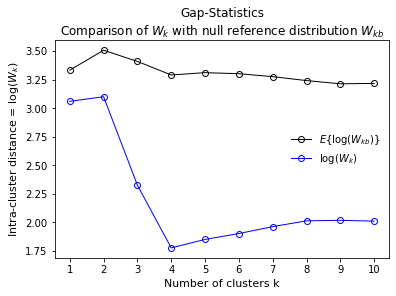

In [16]:
plot_gap(gap, 1)

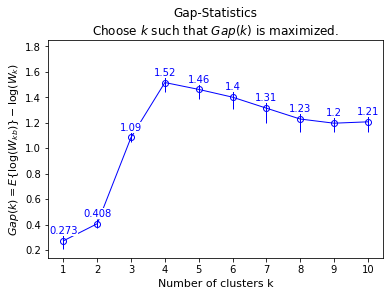

In [17]:
plot_gap(gap, 2)

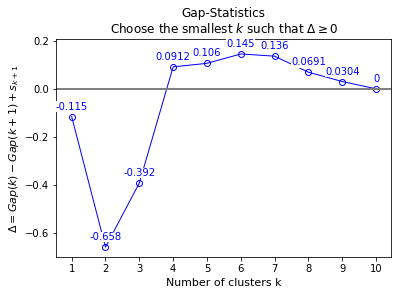

In [18]:
plot_gap(gap, 3)

### Plot all together.

In [19]:
def plot_all(x, labels, n_bootstrap=10, random_state=0, figsize=(12,15)):
    fig, axes = plt.subplots(4,2,figsize=figsize)
    axes = axes.ravel()
    plot_elbow(elbow_index(x, labels), axes[0])
    plot_wb(wb_index(x, labels), axes[1]) 
    plot_ch(calinski_harabasz(x, labels), axes[2])
    plot_hartigan(hartigen_index(x, labels), axes[3])
    plot_silhouette(silhouette(x, labels), axes[4])
    kw = dict(n_bootstrap=n_bootstrap, random_state=random_state)
    gap = gap_statistics(x, labels, **kw)
    for n in range(1,4): plot_gap(gap, n, axes[n+4])
    plt.tight_layout()
    plt.show()

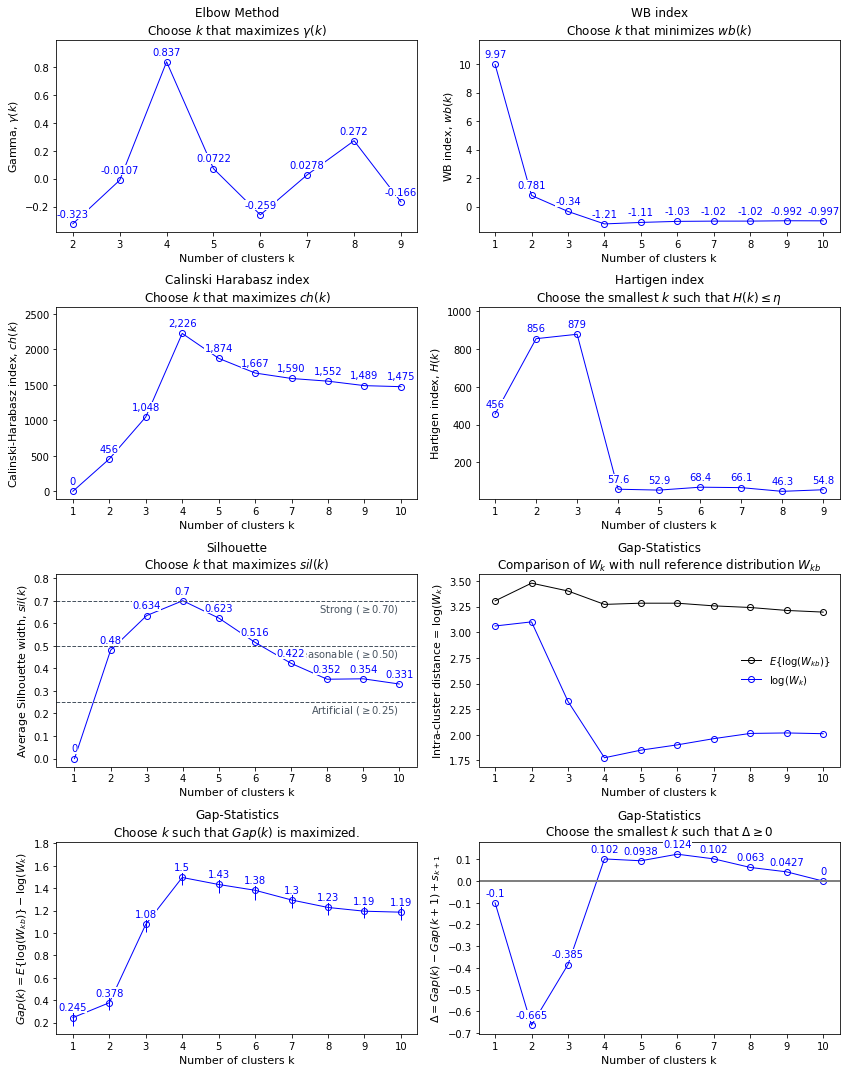

In [20]:
plot_all(X, labels)